# **Global Temperature Change Prediction**

*Through this project we are trying to predict gloabal temperature change for next 10 years using more than 100 years of data.*

In [ ]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
DATA_DIR = '/content/Global Temperature Anomalies - Global Temperature Anomalies - Global Temperature Anomalies.csv'
d= pd.read_csv(DATA_DIR)
df2=d[d['Hemisphere']=='Global']
df=df2[['change temp']]
df

,change temp
0,-0.156667
1,-0.071667
2,-0.096667
3,-0.161667
4,-0.276667
...,...
136,1.018333
137,0.925833
138,0.853333
139,0.985833


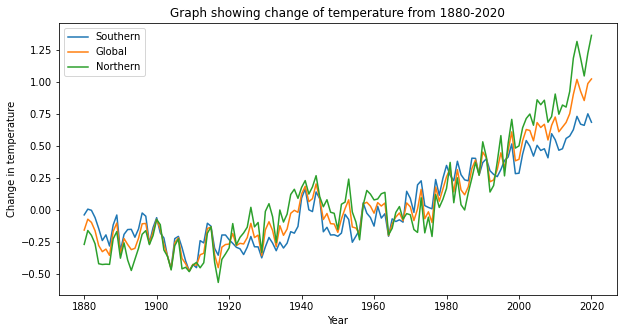

In [ ]:
hemisphere_set=set(d['Hemisphere'])
plt.figure(figsize=(10, 5))
for h in hemisphere_set:
  df1=d.loc[d['Hemisphere']==h]
  x=df1['Year']
  y=df1['change temp']
  plt.plot(x,y,label=h)
plt.xlabel("Year")
plt.ylabel("Change in temperature")
plt.title("Graph showing change of temperature from 1880-2020")
plt.legend()
plt.show()

In [ ]:
#spliting training data set and testing data set in a 90:100 ratio
iltrain= 0.9
split = int(len(df) * 0.9)
training_set = df[:split].values
test_set = df[split:].values

In [ ]:
len(training_set)

126

In [ ]:
# 10-years prediction using 116 years data
x_train = []
y_train = []
future = 10 
past = 116 
for i in range(0, len(training_set) - past - future + 1):
  x_train.append(training_set[i : i + past, 0])
  y_train.append(training_set[i + past : i + past + future, 0])

In [ ]:
x_train , y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0] , x_train.shape[1], 1))

In [ ]:
EPOCHS = 500
BATCH_SIZE = 32
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=116, return_sequences=True, input_shape = (x_train.shape[1], 1))))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units= 116))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = future, activation='relu'))
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])
regressor.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/500
1/1 [==============================] - 7s 7s/step - loss: 0.2779 - acc: 1.0000
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 0.2556 - acc: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 36ms/step - loss: 0.2171 - acc: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 38ms/step - loss: 0.1591 - acc: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0938 - acc: 0.0000e+00
Epoch 6/500
1/1 [==============================] - 0s 40ms/step - loss: 0.0667 - acc: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 41ms/step - loss: 0.1008 - acc: 0.0000e+00
Epoch 8/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0659 - acc: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 41ms/step - loss: 0.0537 - acc: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0740 - acc: 0.0000e+00
Epoch 11/500
1/1 [==============================] - 0s 40ms

In [ ]:
xtest = test_set[:past, 0]
ytest = test_set[0 :10, 0]
xtest, ytest = np.array(xtest), np.array(ytest)
xtest = np.reshape(xtest, (1, xtest.shape[0], 1))
predicted_temperature = regressor.predict(xtest)
print('Predicted temperature {}'.format(predicted_temperature))
print('Real temperature {}'.format(ytest))

Predicted temperature [[0.35053128 0.45345744 0.6232161  0.43095946 0.         0.57374924
  0.68301827 0.6792532  0.57579094 0.7454747 ]]
Real temperature [0.64333333 0.66833333 0.54583333 0.66       0.725      0.61
 0.64583333 0.6825     0.75083333 0.90083333]


In [ ]:
import pandas as pd
l = predicted_temperature.flatten()
lp = l.tolist()
lr = ytest.tolist()

df = pd.DataFrame(list(zip(lp,lr)), columns =['pred', 'real'])
df

,pred,real
0,0.350531,0.643333
1,0.453457,0.668333
2,0.623216,0.545833
3,0.430959,0.660000
4,0.000000,0.725000
5,0.573749,0.610000
6,0.683018,0.645833
7,0.679253,0.682500
8,0.575791,0.750833
9,0.745475,0.900833


Text(0.5, 1.0, 'Grouped Bar Graph for predicted and real temperature')

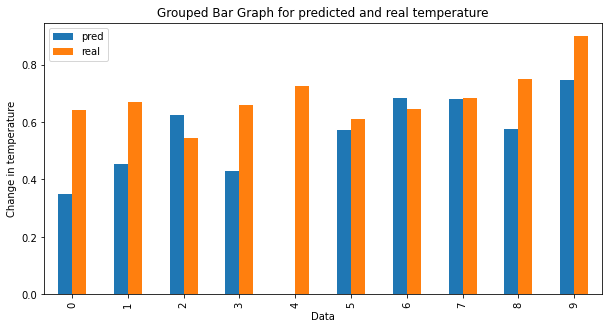

In [ ]:
df.plot.bar(figsize=(10, 5))
plt.xlabel("Data")
plt.ylabel("Change in temperature")
plt.title("Grouped Bar Graph for predicted and real temperature")